Zajęcia zintegrowane FOGT

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()

In [3]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t

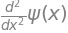

In [4]:
psi(x).diff(x, x)

In [5]:


-k**2 * psi(x)

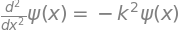

In [6]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [7]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [8]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

In [9]:
#sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
 #sol

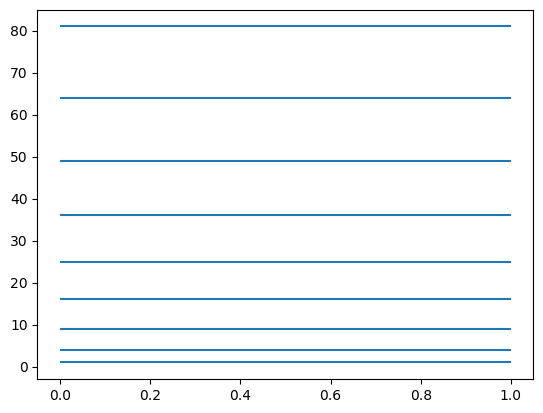

In [10]:
plt.hlines(np.arange(1, 10)**2, 0, 1)

In [11]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [12]:
sol.lhs, sol.rhs

In [13]:
sol.rhs**2

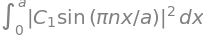

In [14]:
sp.integrate(sp.Abs(sol.rhs)**2, (x, 0, a))

In [15]:
sol.rhs * sp.conjugate(sol.rhs)

In [16]:
sp.integrate(sol.rhs * sp.conjugate(sol.rhs), (x, 0, a))

In [17]:
sp.integrate(sol.rhs**2, (x, 0, a))

In [18]:
sp.Symbol('C1')

In [19]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

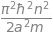

In [20]:
E = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
E

In [21]:
fi = sp.exp(-sp.I * E * t / h)
fi

In [22]:
Psi = sol.rhs * fi
Psi

In [23]:
Psi.subs({m: 1, a:1, h: 1})

In [24]:
Psif = lambdify((x, t, n), Psi.subs({m: 1, a: 1, h: 1}))

In [25]:
Psif(0.3, 0.1, 1)

(1.0076170982526242-0.5419638158437412j)

In [26]:
xs = np.linspace(0, 1, 1000)

Psif(xs, 0.1, 1).real

array([0.00000000e+00, 3.91671122e-03, 7.83338371e-03, 1.17499787e-02,
       1.56664576e-02, 1.95827815e-02, 2.34989117e-02, 2.74148095e-02,
       3.13304362e-02, 3.52457531e-02, 3.91607215e-02, 4.30753025e-02,
       4.69894576e-02, 5.09031480e-02, 5.48163349e-02, 5.87289798e-02,
       6.26410439e-02, 6.65524885e-02, 7.04632749e-02, 7.43733645e-02,
       7.82827186e-02, 8.21912986e-02, 8.60990657e-02, 9.00059813e-02,
       9.39120068e-02, 9.78171037e-02, 1.01721233e-01, 1.05624357e-01,
       1.09526436e-01, 1.13427431e-01, 1.17327305e-01, 1.21226019e-01,
       1.25123534e-01, 1.29019812e-01, 1.32914813e-01, 1.36808501e-01,
       1.40700835e-01, 1.44591778e-01, 1.48481290e-01, 1.52369335e-01,
       1.56255872e-01, 1.60140865e-01, 1.64024274e-01, 1.67906060e-01,
       1.71786186e-01, 1.75664613e-01, 1.79541304e-01, 1.83416218e-01,
       1.87289319e-01, 1.91160567e-01, 1.95029925e-01, 1.98897354e-01,
       2.02762817e-01, 2.06626274e-01, 2.10487687e-01, 2.14347019e-01,
      

In [27]:
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a))

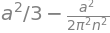

In [28]:
x_square=sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
x_square

$$<p>=?$$   
$$<p^2>=?$$

Czy zasada nieznaczoności faktycznie jest spełniona?   

### *<center> Zadanie 1  </center>* 

$$<p> =\int_{0}^{a} \psi^{*}  -\imath  \hbar \frac{\partial \psi}{\partial x} dx $$   


In [29]:
# średnia pędu  
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol
n=1
p =sol.rhs*(-sp.I)*h*sp.diff(sol.rhs, x) 
sp.integrate(p, (x, 0, a)).simplify()

Wynik: całka równa 0

### *<center> Zadanie 2</center>* 
$$<p^2> = \int_{0}^{a} \psi^{*}  -\imath  \hbar \frac{\partial^{2} \psi}{\partial x^{2}} dx $$


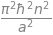

In [30]:
#średnia kwadratu pędu
#n = sp.Symbol('n', real = True)
# n=1 h=1 ?

x_square=sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

first_diff=sp.diff(sol.rhs, x)*(-sp.I)*h

second_diff=sp.diff(first_diff, x) *(-sp.I)*h
p_square =(second_diff*sol.rhs).simplify() 
answer=sp.integrate(p_square, (x, 0, a)).simplify()
answer.subs(n,1)

Wynikiem średniego kwadratu pędu jest $$ \frac{\pi^{2} \hbar^{2} n^{2}}{a^{2}}$$


In [31]:
### Zasada nieoznaczoności jest spełniona
